In [43]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv("./Data/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


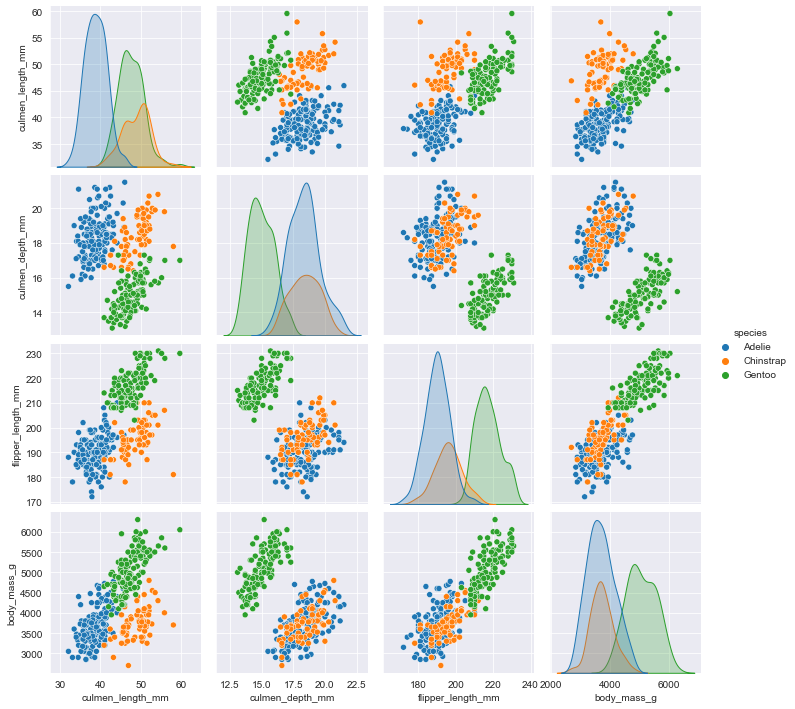

In [45]:
sns.set_style('darkgrid')
sns.pairplot(df, hue = 'species', diag_kind='kde')

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

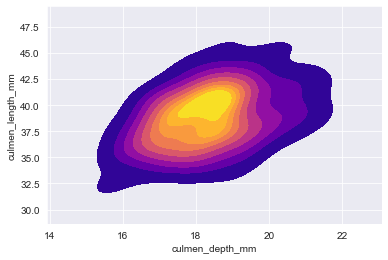

In [46]:
data1 = df[df['species'] == 'Adelie']['culmen_length_mm']
data2 = df[df['species'] == 'Adelie']['culmen_depth_mm']
sns.kdeplot(data2, data1, cmap = 'plasma', shade  = True, shade_lowest= False)

<AxesSubplot:xlabel='island', ylabel='count'>

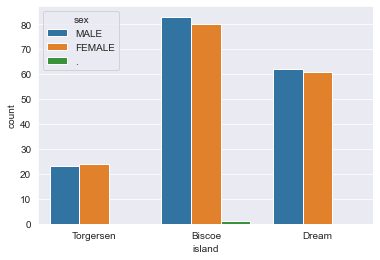

In [47]:
sns.countplot(x = 'island', hue = 'sex', data = df)

<AxesSubplot:xlabel='species', ylabel='count'>

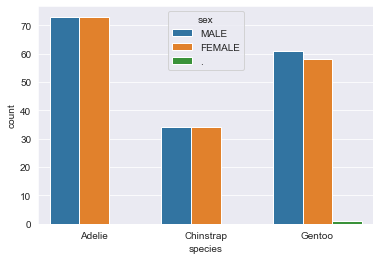

In [48]:
sns.countplot(x = 'species', hue = 'sex', data = df)

In [49]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

**Seems like we have a sex classified by a dot. Lets add a null value so we can see it as a null**

---
Find address

In [50]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


Replace with a None value

In [51]:
df['sex'][336] = None

In [52]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

Lets see the species as a function of island

---
The Adelie is indigenous to all three islands but the Gentoo is only indigenous to Biscoe island & Chinstrap to Dream island

<AxesSubplot:xlabel='island', ylabel='count'>

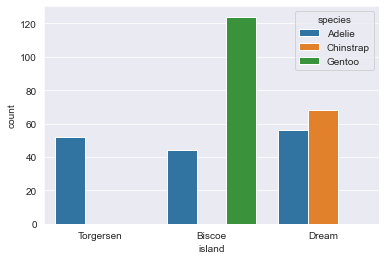

In [53]:
sns.countplot(x = 'island', hue = 'species', data = df) 

Lets check if we have any missing data 

---
The sex column seems to be missing a few values and maybe a couple of rows missing the sex & charactristics features

<AxesSubplot:>

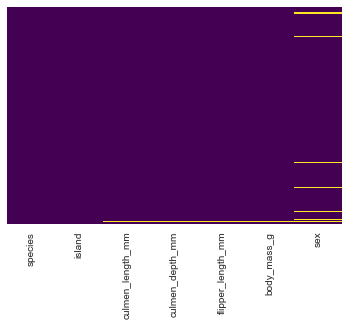

In [54]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Lets take a closer look on how many values are missing

---
Ten penguins are missing there sex identification and 2 rows missing all numeric data

In [55]:
df[df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,None


Lets drop the 2 columns that have all the numeric data missing since it's too much for imputation to make a difference to the over all performance to the model

In [56]:
df.drop(index = [3,339], inplace = True)

Now remains 8 missing sex data

In [57]:
df[df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,None


To identify sex lets exaime the average numeric values as a function of species & sex

---
From the below table, it seems that aside from index 9, they are all females.

In [58]:
df.groupby(['species','sex']).mean()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species   sex                                                            
Adelie    FEMALE         37.257534        17.621918         187.794521   
          MALE           40.390411        19.072603         192.410959   
Chinstrap FEMALE         46.573529        17.588235         191.735294   
          MALE           51.094118        19.252941         199.911765   
Gentoo    FEMALE         45.563793        14.237931         212.706897   
          MALE           49.473770        15.718033         221.540984   

                  body_mass_g  
species   sex                  
Adelie    FEMALE  3368.835616  
          MALE    4043.493151  
Chinstrap FEMALE  3527.205882  
          MALE    3938.970588  
Gentoo    FEMALE  4679.741379  
          MALE    5484.836066

In [59]:
df['sex'][8] = df['sex'][10] = df['sex'][11] = df['sex'][47] = df['sex'][246] = df['sex'][286] = df['sex'][324] = df['sex'][336] = 'FEMALE'
df['sex'][9] = 'MALE'

<AxesSubplot:>

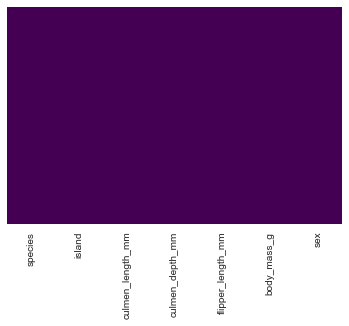

In [60]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The next four graphs are visual representation of the averages across the charactristics for male & female

<AxesSubplot:xlabel='sex', ylabel='body_mass_g'>

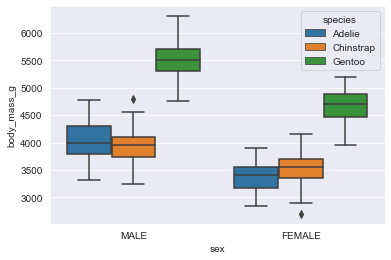

In [61]:
sns.boxplot(x='sex', y= 'body_mass_g', hue = 'species', data = df)

<AxesSubplot:xlabel='sex', ylabel='culmen_depth_mm'>

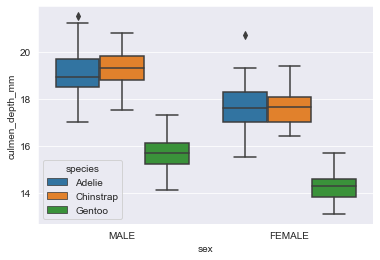

In [62]:
sns.boxplot(x='sex', y= 'culmen_depth_mm', hue = 'species', data = df)

<AxesSubplot:xlabel='sex', ylabel='culmen_length_mm'>

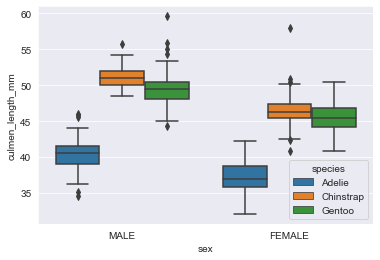

In [63]:
sns.boxplot(x='sex', y= 'culmen_length_mm', hue = 'species', data = df)

<AxesSubplot:xlabel='sex', ylabel='flipper_length_mm'>

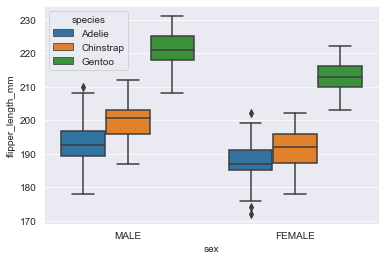

In [64]:
sns.boxplot(x='sex', y= 'flipper_length_mm', hue = 'species', data = df)

** Lets convert the categorical columns of island and sex to a form the algorithm will understand **

In [65]:
island = pd.get_dummies(df['island'], drop_first=True)

In [66]:
sex = pd.get_dummies(df['sex'], drop_first=True)

** Now that the island & sex columns are converted, lets drop them and concat the new columns to the DataFrame **

In [67]:
df.drop(['sex','island'], axis = 1, inplace=True)

In [68]:
df = pd.concat([df, island, sex], axis = 1)

# Machine Learning

### <span style="color:blue">SVR</span>.

**Step1: Split the data into a training set and testing set with a test set size of 30%**

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X = df.drop(['species'], axis = 1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Step 2: Call the SVC() model from sklearn and fit the model to the training data.**

In [71]:
from sklearn.svm import SVC

In [72]:
model = SVC()

In [73]:
model.fit(X_train, y_train)

SVC()

**Step 3: Get model predictions**

In [74]:
pred = model.predict(X_test)

**Step4: create a confusion matrix and a classification report.**

In [75]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [76]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, pred)))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

Accuracy: 0.71


[[38  0  3]
 [22  0  3]
 [ 2  0 35]]


              precision    recall  f1-score   support

      Adelie       0.61      0.93      0.74        41
   Chinstrap       0.00      0.00      0.00        25
      Gentoo       0.85      0.95      0.90        37

    accuracy                           0.71       103
   macro avg       0.49      0.62      0.55       103
weighted avg       0.55      0.71      0.62       103



#### Optimization

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [78]:
param_grid = {'C':[0.1, 1,10,100,1000, 10000, 100000,1000000,10000000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001,0.000001,0.0000001,0.00000001]}

In [79]:
grid = GridSearchCV(SVC(), param_grid, verbose=1)

In [80]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000,
                               10000000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08]},
             verbose=1)

In [81]:
grid.best_params_

{'C': 1000000, 'gamma': 1e-07}

In [82]:
grid_pred = grid.predict(X_test)

In [83]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, grid_pred)))
print('\n')
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test, grid_pred))

Accuracy: 0.98


[[41  0  0]
 [ 2 23  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.92      0.96        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       103
   macro avg       0.98      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103



### <span style="color:blue">Logistic Regression</span>.

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel = LogisticRegression(max_iter=1000)

In [86]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [87]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [88]:
logpred = logmodel.predict(X_test)

In [89]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, logpred)))
print('\n')
print(confusion_matrix(y_test, logpred))
print('\n')
print(classification_report(y_test, logpred))

Accuracy: 1.00


[[41  0  0]
 [ 0 25  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        41
   Chinstrap       1.00      1.00      1.00        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



### <span style="color:blue">Decision Tree</span>.

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dtree = DecisionTreeClassifier()

In [92]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
dtreePred = dtree.predict(X_test)

In [94]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, dtreePred)))
print('\n')
print(confusion_matrix(y_test, dtreePred))
print('\n')
print(classification_report(y_test, dtreePred))

Accuracy: 0.95


[[40  1  0]
 [ 4 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.91      0.98      0.94        41
   Chinstrap       0.95      0.84      0.89        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.95       103
   macro avg       0.95      0.94      0.94       103
weighted avg       0.95      0.95      0.95       103



### <span style="color:blue">Random Forest</span>.

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf = RandomForestClassifier(n_estimators=90)

In [97]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90)

In [98]:
rfPred = rf.predict(X_test)

In [99]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, rfPred)))
print('\n')
print(confusion_matrix(y_test, rfPred))
print('\n')
print(classification_report(y_test, rfPred))

Accuracy: 0.97


[[41  0  0]
 [ 3 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        41
   Chinstrap       1.00      0.88      0.94        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       103
   macro avg       0.98      0.96      0.97       103
weighted avg       0.97      0.97      0.97       103



### <span style="color:blue">KNN</span>.

#### Standarize Variables

**Step 1: Create an instance of StandardScaler & fit the dataset to it**

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
Scaler = StandardScaler()

In [126]:
Scaler.fit(X)

StandardScaler()

**Step 2: Transorm the data to a scaled version using the .transform() method**

In [127]:
scaler_feature = Scaler.transform(X)

**Step 3: Convert the scaled features to a dataframe and check if scaling worked.**

In [129]:
X_feat = pd.DataFrame(scaler_feature, columns=X_train.columns)
X_feat

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,MALE
0,-0.884499,0.785449,-1.418347,-0.564142,-0.754193,2.388699,1.011765
1,-0.811126,0.126188,-1.062250,-0.501703,-0.754193,2.388699,-0.988372
2,-0.664380,0.430462,-0.421277,-1.188532,-0.754193,2.388699,-0.988372
3,-1.324737,1.089724,-0.563715,-0.938776,-0.754193,2.388699,-0.988372
4,-0.847812,1.748985,-0.777373,-0.689020,-0.754193,2.388699,1.011765
...,...,...,...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175,-0.754193,-0.418638,-0.988372
338,0.527932,-1.445897,1.003109,0.809516,-0.754193,-0.418638,-0.988372
339,1.188289,-0.735923,1.501644,1.933419,-0.754193,-0.418638,1.011765
340,0.234440,-1.192335,0.789451,1.246590,-0.754193,-0.418638,-0.988372


In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
X = X_feat
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [131]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [132]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [133]:
KNNPred = KNN.predict(X_test)

In [134]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, KNNPred)))
print('\n')
print(confusion_matrix(y_test, KNNPred))
print('\n')
print(classification_report(y_test, KNNPred))

Accuracy: 0.99


[[41  0  0]
 [ 1 24  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



#### Optimization

In [135]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

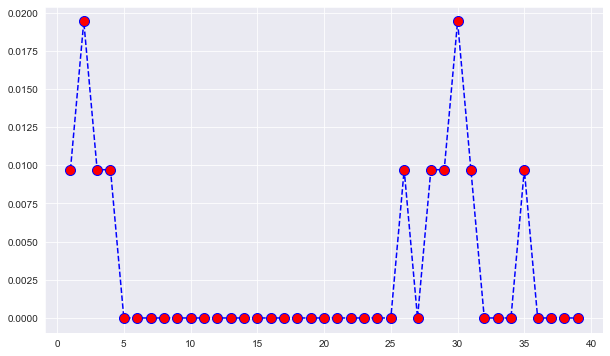

In [136]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', ls = '--', marker = 'o', markerfacecolor = 'red', markersize = 10)

**Step 3: Retrain model with the best K value & get model predictions**

In [140]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_i = knn.predict(X_test)

**Step 4: Re-create the classification report and the confusion matrix**

In [142]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, pred_i)))
print('\n')
print(confusion_matrix(y_test, pred_i))
print('\n')
print(classification_report(y_test, pred_i))

Accuracy: 1.00


[[41  0  0]
 [ 0 25  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        41
   Chinstrap       1.00      1.00      1.00        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

